In [2]:
#Load libraries
import numpy as np
import math 
import matplotlib.pyplot as plt 
import time
from sklearn.svm import OneClassSVM
%matplotlib inline

#Load dataset
data = np.genfromtxt('art_daily_jumpsdown.csv', delimiter=',')

# MUSUC

In [11]:
SVM=OneClassSVM()
#Reshape data for one class svm
data_re=data.reshape(-1,1)
online_X_train=data_re[0]

N=len(data_re)
C=10**6 #Threshold value
i=0
sigma=[0] #List of indices of detected anomalies

#Initialize variables to store MUSUC outputs
E_n=np.zeros(len(data_re))
E_score=[]

for n in range(1,N):
    #Take sequence of data samples from last anomaly detected to n
    seq=data_re[sigma[i]+1:n+1]
    if len(seq)==1: #E_n for a sequence of length one is equal to one
        score=1
        E_n[n]=score
    else:
        #Calculate E-value for test sample based on sequence
        SVM.fit(seq)
        d_func=SVM.decision_function(seq)
        score=-1*d_func
        if np.std(score)==0:
            E_val=(score-(np.mean(score)))  +1
        else:
            E_val=0.1*((score-(np.mean(score)))/np.std(score))  +1
        E_n[n]=E_val[-1]
    
    #MUSUC output is the product of all previous E-values from last anomaly detected to n
    E_prod=np.prod(E_n[sigma[i]+1:n+1])

    E_score=np.append(E_score,E_prod)
    
    #If the MUSUC value reaches the threshold record its indices
    if E_prod>C:
        i=i+1
        sigma=np.append(sigma,n)


Text(0.5, 1.0, ' MUSUC - Jump Down Dataset - Threshold = $10^6$')

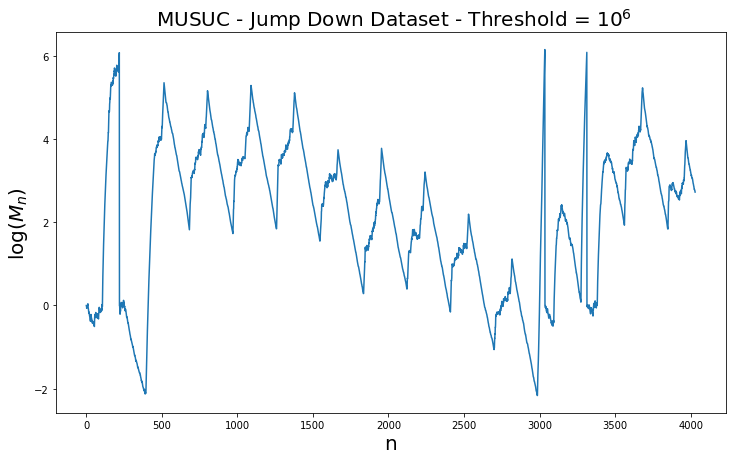

In [12]:
plt.figure(figsize=(12,7))
plt.plot(range(len(E_score)),np.log10(E_score))
plt.xlabel("n",fontsize=20)
plt.ylabel("log($M_n$)",fontsize=20)
plt.title(" MUSUC - Jump Down Dataset - Threshold = $10^6$",fontsize=20)

Text(0, 0.5, 'Value')

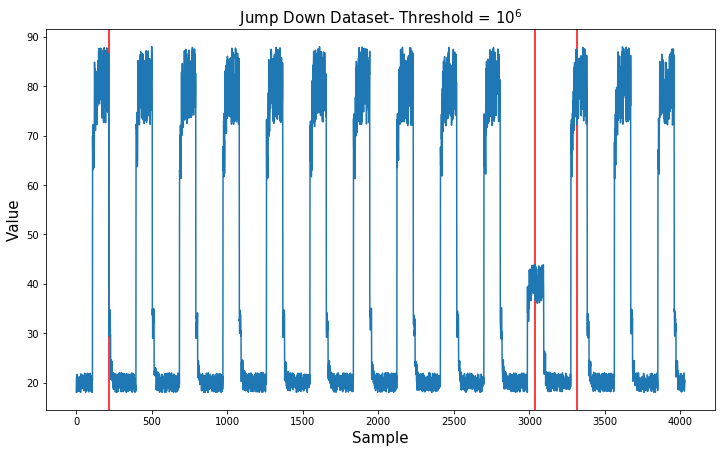

In [13]:
plt.figure(figsize=(12,7))
for p in sigma[1:]:
    plt.axvline(x=p,c="r",alpha=1)
plt.plot(range(len(data)),data)
plt.title("Jump Down Dataset- Threshold = $10^6$",fontsize=15)
plt.xlabel("Sample",fontsize=15)
plt.ylabel("Value",fontsize=15)